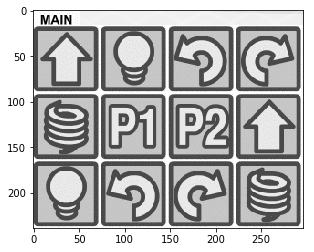

In [2]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os


img2 = cv2.imread("virtual_imgs/main.png",0)

plt.imshow(img2,cmap = 'gray')
plt.show()

detector = cv2.xfeatures2d.SIFT_create()
matcher = cv2.BFMatcher(cv2.NORM_L2)
kp2, des2 = detector.detectAndCompute(img2, None)

number of estimated clusters : 13
p1.png


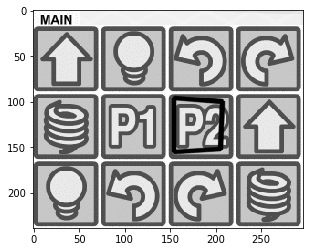

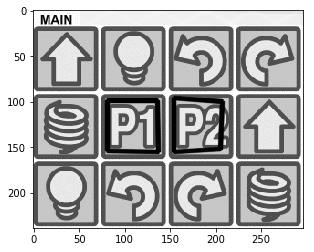

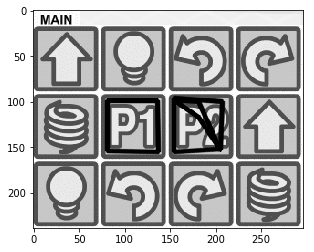

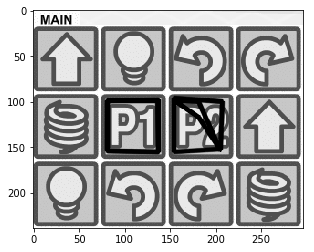

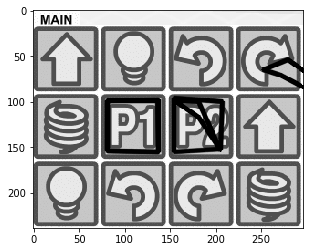

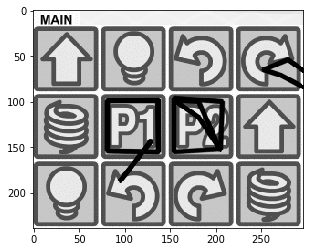

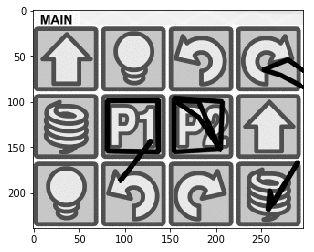

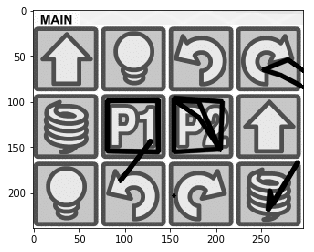

seta.jpg


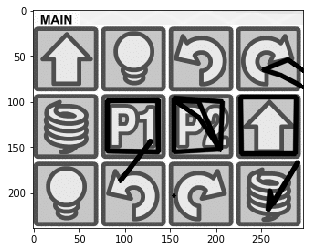

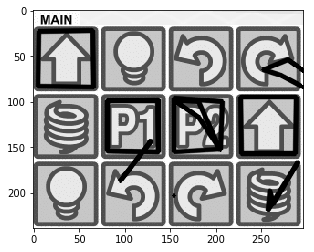

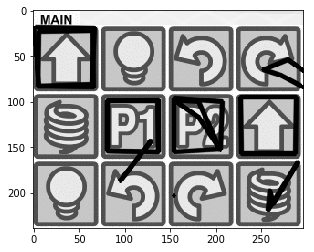

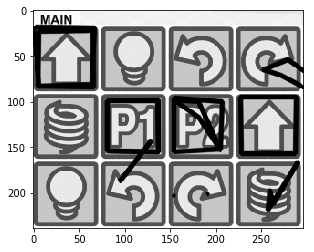

pula.jpg


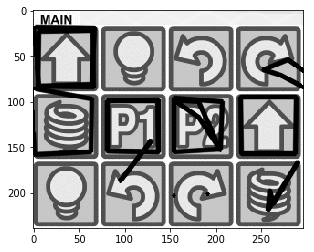

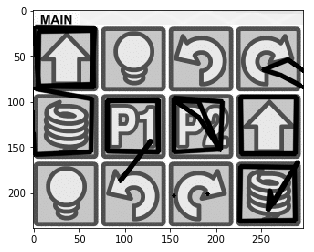

dir.jpg


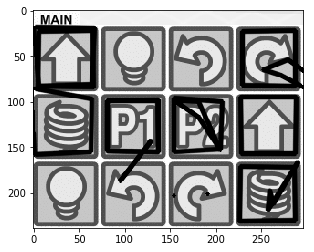

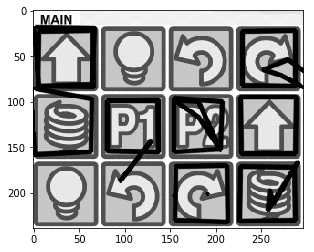

lamp.jpg


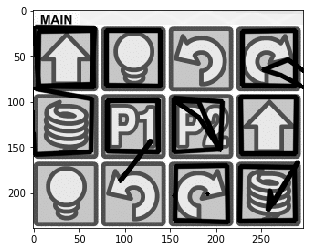

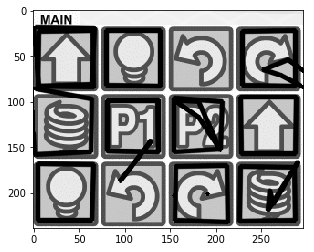

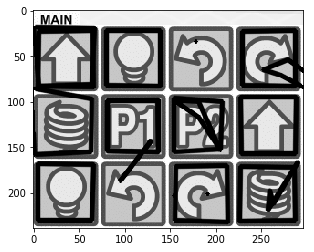

esq.jpg


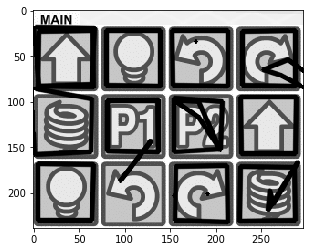

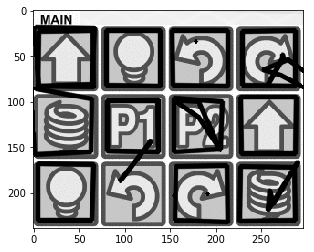

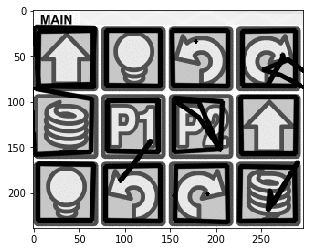

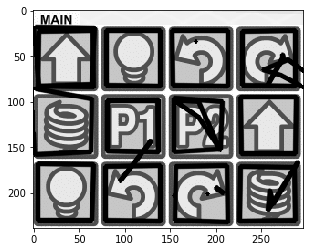

p2.png


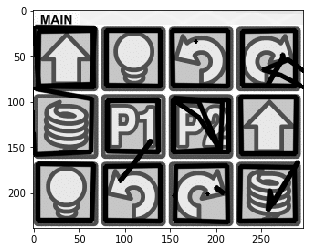

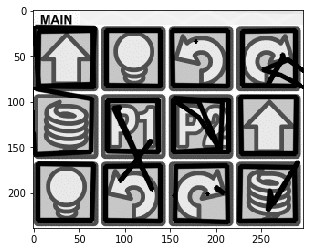

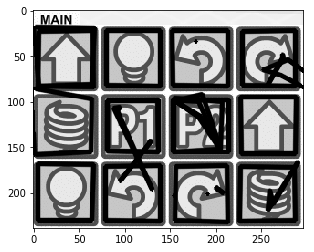

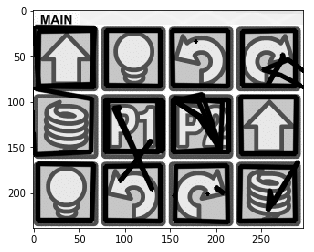

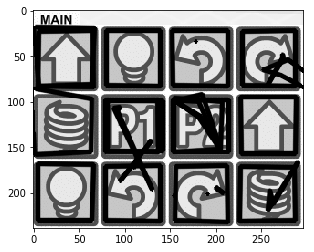

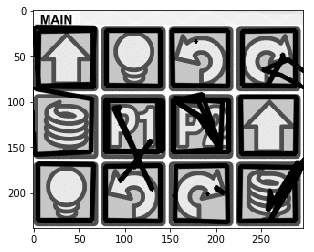

In [3]:
img2 = cv2.imread("virtual_imgs/main.png",0)
kp2, des2 = detector.detectAndCompute(img2, None)

x = np.array([kp2[0].pt])
for i in range(len(kp2)):
    x = np.append(x, [kp2[i].pt], axis=0)

x = x[1:len(x)]
bandwidth = estimate_bandwidth(x, quantile=0.075, n_samples=len(x))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=True)
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

s = [None] * n_clusters_
for i in range(n_clusters_):
    l = ms.labels_
    d, = np.where(l == i)
    s[i] = list(kp2[xx] for xx in d)

des2_ = des2
    
for file in os.listdir('icones_p1p2'):
    print(file)
    img1 = cv2.imread("icones_p1p2/"+file,0)
    kp1, des1 = detector.detectAndCompute(img1, None)
    
    
    for i in range(n_clusters_):

        kp2 = s[i]
        l = ms.labels_
        d, = np.where(l == i)
        des2 = des2_[d, ]


        des1 = np.float32(des1)
        des2 = np.float32(des2)

        matches = matcher.knnMatch(des1, trainDescriptors = des2, k = 2)

        good = []
        for m,n in matches:
            if m.distance < 0.8*n.distance:
                good.append(m)

        if len(good)>3:
            src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
            dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 2)

            if M is not None:
                matchesMask = mask.ravel().tolist()

                h,w = img1.shape
                pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
                dst = cv2.perspectiveTransform(pts,M)

                img2 = cv2.polylines(img2,[np.int32(dst)],True,(0, 255, 0),3, cv2.LINE_AA)

                plt.imshow(img2, 'gray'), plt.show()

        else:
            #print ("Not enough matches are found - %d/%d" % (len(good),3))
            matchesMask = None